# Image Information

The main objectives of this module are:

* Manipulate an image with Python, scikit-image and numpy.
* Process images at the pixel level.
* Compute and understand image histograms.
* Understand lossless compression & reconstruction.
* Understand the co-occurrence matrix.
* Use different colour representations.

## 1. Read & write an image

In this exercise, we will simply open an image file, display it, and save a copy. 

**Use the [scikit-image io](https://scikit-image.org/docs/dev/api/skimage.io.html) module to open, show & save a copy of the "camera.jpg" image.**

*Note: we use the **%matplotlib inline** command to display the image in the notebook. It would not be necessary if you execute the code in the terminal or in a standard IDE like PyCharm.*

In [2]:
from skimage.io import imread,imsave,imshow
%matplotlib inline

## -- Your code here -- ##
image = imread("camera.jpg")

When you open an image with scikit-image, it is stored as a Numpy [ndarray](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html) object. Numpy arrays are objects which can be easily manipulated for numerical computations.

**Using *ndarray* methods & attributes, answer the following questions about the "camera" image:**

1. What is the shape of the image? (width & height)
1. What is the minimum pixel value? What is the maximum pixel value?
1. What is the data type for each pixel?
1. Show only a 100x100 pixels window taken at the center of the image.

(512, 512)
0
uint8


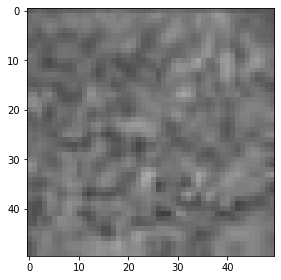

In [3]:
import numpy as np

## -- Your code here -- ##
print(image.shape)
print(np.amin(image))
print(image.dtype)
sub_image = image[image.shape[0] - 50: image.shape[0] + 50, image.shape[1] - 50: image.shape[1] + 50]
imshow(sub_image)

## 2. Image histograms

* Compute and plot the **histogram** and the **normalized histogram** of the example cameraman image given below.

You can use the [pyplot module](https://matplotlib.org/api/pyplot_api.html) from matplotlib to display plots & histograms.

(0.0, 255.0)

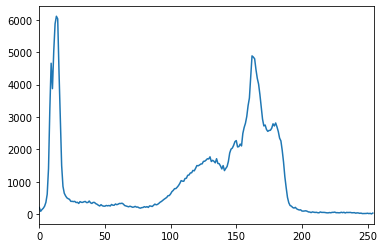

In [4]:
from matplotlib import pyplot as plt

## -- Your code here -- ##
image_array = image.reshape(1, -1)
histogram = np.histogram(image_array, 255)
plt.plot(histogram[0])
plt.xlim([0, 255])

Can you use the histogram to answer the following questions ? (you don't need to code anything here)

1. What is the average gray value of the cameraman ?
1. What is the average gray value of the sky ?
1. Is there more 'cameraman' pixels than 'sky' pixels ?

Compute and plot the **cumulated histogram**.

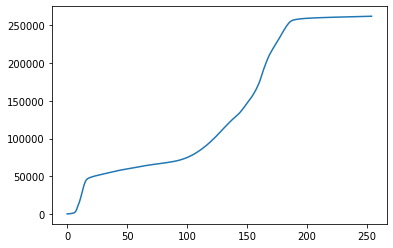

In [5]:

## -- Your code here -- ##
cumulated_hist = np.cumsum(histogram[0])
plt.plot(cumulated_hist)


## 3. Image entropy

The "entropy" of a signal, in information theory, can generally be interpreted as the "number of bits required to encode the signal". It is a measure of the "amount of information" contained in the signal. Intuitively, a signal with a very narrow distribution (all values are close to each other) will have a very low entropy, while a signal with a wide distribution (the values are evenly distributed) will have a higher entropy.

1. Compute the image entropy of the cameraman image. The image entropy is given by $e = - \sum_{g=0}^N p(g) \log_2(p(g))$ where $p(g)$ is the probability that a pixel has the grayscale value g, and N is the number of possible grayscale values. Note that p(g) is directly given by the normalized histogram.
1. What is the entropy of a shuffled version of the cameraman ?

In [6]:
# -- Your code here -- #
normed_histogram = histogram[0] / image_array.shape[1]
entropy = 0
for i in range(normed_histogram.shape[0]):
    entropy -= normed_histogram[i] * np.log2(normed_histogram[i])
    
print(int(np.ceil(entropy))) # result is rounded up to 8 bits.

8


## 4. Image compression

Using the code below as a starting point:

* **Decompose an image** by recursively subsampling its dimensions and computing the remainders, such that each level of recursion performs the following operation:

<img src='./PyramidCompression.png' width='75%'/>

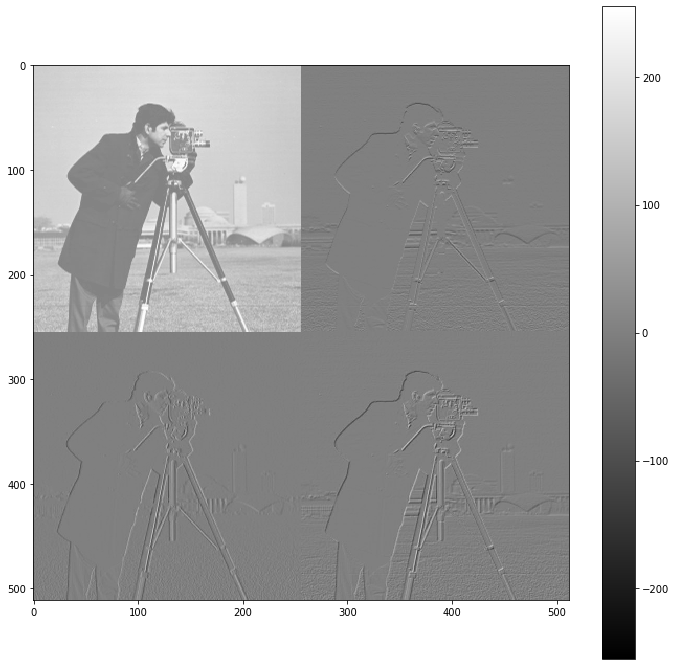

In [7]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from skimage.io import imread

# Modify this method:
def split(im):
    a = im[0::2,0::2] # yellow
    b = im[1::2,0::2] # green
    c = im[0::2,1::2] # blue
    d = im[1::2,1::2] # black
    
    b = b - a
    c = c - a
    d = d - a
    
    R = np.vstack((np.hstack((a,b)),np.hstack((c,d))))
    return R

im = imread('camera.jpg').astype(np.int16) # cast the camera image as a signed integer to avoid overflow
s = split(im)

plt.figure(figsize=(12,12))
# interpolation='nearest' -> don't try to interpolate values between pixels if the size of the display is different from the size of the image
# cmap=cm.gray -> display in grayscale
# vmin=-255 -> set "black" as -255
# vmax=255 -> set "white" as 255
plt.imshow(s,interpolation='nearest',cmap=cm.gray,vmin=-255, vmax=255)
plt.colorbar()

plt.show()

**Compute how the image entropy evolves** with regards to the level of decomposition

In [8]:

# -- Your code here -- #
def compute_entropy(image):
    image_array = image.reshape(1, -1)
    histogram = np.histogram(image_array, 256)[0]
    normed_histogram = histogram / image_array.shape[1]
    entropy = 0
    for i in range(normed_histogram.shape[0]):
        if (normed_histogram[i] != 0):
            entropy -= normed_histogram[i] * np.log2(normed_histogram[i])
    return entropy

half_size_x = int(s.shape[0]/2)
half_size_y = int(s.shape[1]/2)

im_first = s[0:half_size_x, 0:half_size_y]
im_second = s[0:half_size_x, half_size_y:]
im_third = s[half_size_x:, 0:half_size_y]
im_fourth = s[half_size_x:, half_size_y:]

en_fist = compute_entropy(im_first)
en_second = compute_entropy(im_second)
en_third = compute_entropy(im_third)
en_fourth = compute_entropy(im_fourth)

print(en_fist)
print(en_second)
print(en_third)
print(en_fourth)

7.044670962258126
4.067047216726292
4.025194524910972
4.241162448086176


**Rebuild the original image** from the pyramid (allowing the selection the level of recursion)

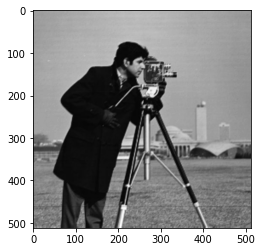

In [9]:

# -- Your code here -- #
rebuilt_image = np.zeros(im.shape, dtype=np.uint8)
im_reb_first = im_first
im_reb_second = im_second + im_first
im_reb_third = im_third + im_first
im_reb_fourth = im_fourth + im_first

rebuilt_image[0::2, 0::2] = im_first
rebuilt_image[0::2, 1::2] = im_first + im_second
rebuilt_image[1::2, 0::2] = im_first + im_third
rebuilt_image[1::2, 1::2] = im_first + im_fourth

plt.imshow(rebuilt_image, cmap=cm.gray)
plt.show()


## 5. Co-occurrence matrix

While the histogram of an image is independent of the position of the pixels, the co-occurrence matrix gives us information about their spatial distribution.

A co-occurrence matrix is computed for a given displacement, looking at the pair of values spatially separated by that displacement. The co-occurrence matrix is a square matrix, its size given by the number of possible values that a pixels can take in the image.

1. Compute de [cooccurrence matrix](https://en.wikipedia.org/wiki/Co-occurrence_matrix) for a chosen displacement $(\Delta x,\Delta y)$ (see [greycomatrix](http://scikit-image.org/docs/dev/api/skimage.feature.html#skimage.feature.greycomatrix) in scikit-image)
1. What is the entropy of the cooccurrence matrix ?
1. How does this entropy evolve if we increase the displacement ?

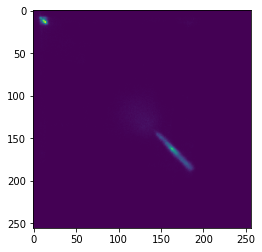

In [10]:
from skimage.feature import greycomatrix

# -- Your code here -- #
def compute_cooccurrence(image, d_x, d_y):
    matrix = np.zeros((256, 256), dtype=np.uint32)
    for x in range(image.shape[0]):
        for y in range(image.shape[1]):
            if x + d_x >= 0 and x + d_x < image.shape[0] and y + d_y >= 0 and y + d_y < image.shape[1]:
                matrix[image[x, y], image[x + d_x, y + d_y]] += 1
    return matrix

coo_mat = compute_cooccurrence(im, -10, -5)
plt.imshow(coo_mat)
plt.show()

## 6. Colour representations

A colour image is typically encoded with three channels: Red, Green and Blue. In the example below, we open the *immunohistochemistry()* example image and split it into the three channels, which we display: 

(512, 512, 3) uint8


<Figure size 432x288 with 0 Axes>

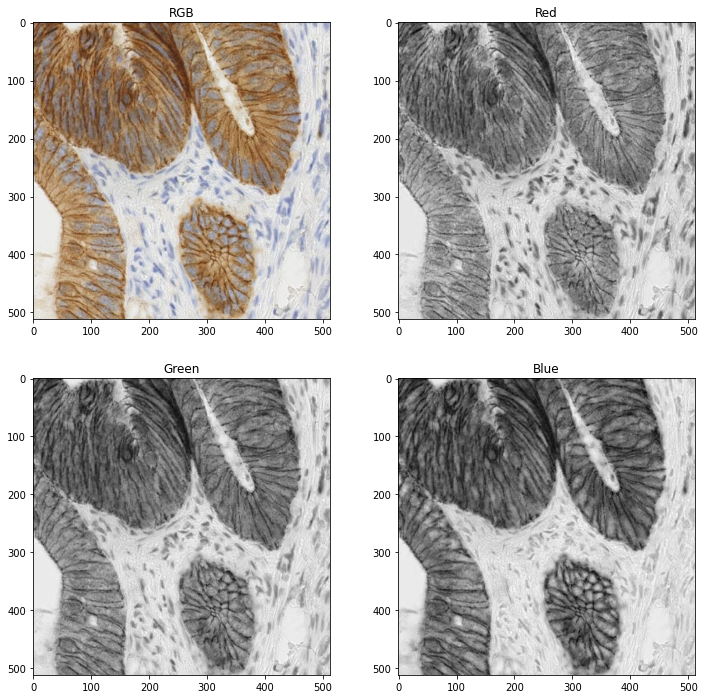

In [11]:
from skimage.data import immunohistochemistry

im = immunohistochemistry() # scikit-image method to load the example image
print(im.shape,im.dtype)
r = im[:,:,0]
g = im[:,:,1]
b = im[:,:,2]

plt.gray() # Use grayscale by default on 1-channel images, so you don't have to add cmap=plt.cm.gray everytime

plt.figure(figsize=(12,12))
plt.subplot(2,2,1)
plt.imshow(im)
plt.title('RGB')
plt.subplot(2,2,2)
plt.imshow(r)
plt.title('Red')
plt.subplot(2,2,3)
plt.imshow(g)
plt.title('Green')
plt.subplot(2,2,4)
plt.imshow(b)
plt.title('Blue')
plt.show()

1. Compute & show the color histograms
1. Convert the image to the HSV color space & compute the HSV histograms. [See the skimage documentation for reference on color transformation](http://scikit-image.org/docs/dev/api/skimage.color.html#rgb2hsv)
1. Find a method to isolate the brown cells in the immunohistochemistry image
    1. In the RGB space
    1. In the HSV space

[]

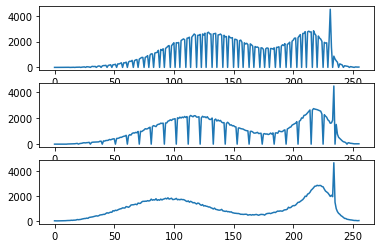

In [12]:

# -- Your code here -- #
image = immunohistochemistry()
image_r = image[:, :, 0]
image_g = image[:, :, 1]
image_b = image[:, :, 2]

r_histo = np.histogram(image_r, 256)[0]
g_histo = np.histogram(image_g, 256)[0]
b_histo = np.histogram(image_b, 256)[0]

plt.subplot(311)
plt.plot(r_histo)
plt.subplot(312)
plt.plot(g_histo)
plt.subplot(313)
plt.plot(b_histo)
plt.plot()


# Coding Project - Watermark

Write code to automatically add a watermark to a photograph.

<img src='./ex_wm.jpg' width="500px" />

## Main requirements

The minimum requirements are to:
* Add the white pixels from the watermark somewhere in the photograph.
* Save the resulting image as an image file & display it in the notebook

You may use the *watermark.png* file available in the GitHub repository, or choose/create your own.

## Additional requirements

For extra points, you may add some possible improvements (note: this is not an exhaustive list, use your imagination!)

* Add an option to choose the watermark location
* Add transparency effect to the watermark
* Determine if the watermark should be dark or light based on the luminosity of the image
* ...


Watermark top-left location <x,y>: 30,30
232


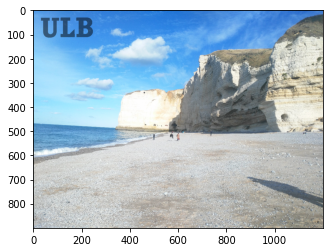

In [100]:

# -- Your code here -- #
image = imread('etretat.jpg')
watermark = imread('watermark.png')

# Asks for position of the watermark
inp = input('Watermark top-left location <x,y>: ')
inp = inp.split(',')
x = int(inp[0])
y = int(inp[1])

if x < 0 or x + watermark.shape[0] > image.shape[0] or y < 0 or y + watermark.shape[1] > image.shape[1]:
    print('Out of bounds location for the watermark. Watermark shape is {}.'.format(watermark.shape))

# transform it in a mask
watermark = np.divide(watermark, 255.0)
mask = np.zeros(image.shape, dtype=np.uint8)

for depth in range(3):
    mask[x: x + watermark.shape[0], y: y + watermark.shape[1], depth] = watermark[:, :]
    
# checks if the image should be watemarked in black or in white (histogram in the watermark region)
local_histogram = np.histogram(image[mask == 1], 255)[0]
max_location = np.argmax(local_histogram)  # Histogram peak position
print(max_location)
if max_location < 128:
    watermark_value = 255
else:
    watermark_value = 0
    
# transparency value
transparency = 0.5

# Sets the pixels to 255 at the right mask values
image[mask == 1] = image[mask == 1] * (1.0 - transparency) + watermark_value * transparency

imsave('output.png', image)
plt.imshow(image)
plt.show()